In [204]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [205]:
reg_data = pd.read_csv('WithOutliers.csv', sep=',')

In [206]:
reg_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares,log_shares,cl_shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.600,-0.200000,0.500000,-0.187500,0.000000,593,6.385194,0
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.125,-0.100000,0.000000,0.000000,0.500000,711,6.566672,0
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.800,-0.133333,0.000000,0.000000,0.500000,1500,7.313220,1
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.600,-0.166667,0.000000,0.000000,0.500000,1200,7.090077,0
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.500,-0.050000,0.454545,0.136364,0.045455,505,6.224558,0


In [207]:
reg_data.shape

(38448, 45)

In [208]:
X = reg_data.iloc[:, :42]
X.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.013699,0.769231,0.378636,0.100000,0.7,-0.600,-0.200000,0.500000,-0.187500,0.000000
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.015686,0.733333,0.286915,0.033333,0.7,-0.125,-0.100000,0.000000,0.000000,0.500000
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.009479,0.857143,0.495833,0.100000,1.0,-0.800,-0.133333,0.000000,0.000000,0.500000
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.020716,0.666667,0.385965,0.136364,0.8,-0.600,-0.166667,0.000000,0.000000,0.500000
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.012127,0.860215,0.411127,0.033333,1.0,-0.500,-0.050000,0.454545,0.136364,0.045455


In [209]:
y = reg_data.shares
y

0         593
1         711
2        1500
3        1200
4         505
         ... 
38443    1800
38444    1900
38445    1900
38446    1100
38447    1300
Name: shares, Length: 38448, dtype: int64

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [211]:
accuracy = dict()

# Regression modeling

Regression models:
- Linear regression
- Lasso regression
- Ridge regression
- Random forest
- Decision Tree
- K-nearest neighbors

## Linear regression

### Baseline

In [212]:
# QuantileTransformer
lin_reg_qt_pipeline = make_pipeline(QuantileTransformer(), LinearRegression())
score_lin_qt = cross_val_score(lin_reg_qt_pipeline, X, y, scoring="r2", cv=5)
print("R2 mean: ", score_lin_qt.mean())

R2 mean:  0.0233414603746791


In [213]:
y_pred_lin_qt = cross_val_predict(lin_reg_qt_pipeline, X, y, cv=5)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_lin_qt))
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_lin_qt))

R2 score for prediction:  0.01831911638000494
Mean squared error:  131818861.13219804


### Linear regression with GridSearchCV

In [214]:
pipeline = Pipeline([("qt", QuantileTransformer()), ("linreg", LinearRegression())])
parameters = {
    'qt__n_quantiles': [1500],
    'linreg__fit_intercept': [True, False],
    'linreg__copy_X': [True, False]
}
grid_lin = GridSearchCV(pipeline, parameters)
lin_fit = grid_lin.fit(X_train, y_train)

lin_est = lin_fit.best_estimator_
y_pred_lin = lin_est.predict(X_test)
print("R2 score for prediction: ", metrics.r2_score(y_test, y_pred_lin))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred_lin))
accuracy["R2 score linear regression"] = metrics.r2_score(y_test, y_pred_lin)

R2 score for prediction:  0.02372937841815803
Mean squared error:  121936017.47568306


## Lasso

### Baseline

In [215]:
# QuantileTransformer
lasso_reg_qt_pipeline = make_pipeline(QuantileTransformer(), Lasso())
score_lin_qt = cross_val_score(lasso_reg_qt_pipeline, X, y, scoring="r2", cv=5)
print("R2 mean: ", score_lin_qt.mean())

R2 mean:  0.02389158761717005


In [216]:
y_pred_lasso_qt = cross_val_predict(lasso_reg_qt_pipeline, X, y, cv=5)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_lasso_qt))
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_lasso_qt))

R2 score for prediction:  0.019081950220511845
Mean squared error:  131716428.77381502


### Lasso regression with GridSearchCV

In [217]:
pipeline = Pipeline([("qt", QuantileTransformer()), ("lasso", Lasso())])
parameters = {
    'qt__n_quantiles': [500],
    'lasso__fit_intercept': [True, False],
    'lasso__precompute': [ False],
    'lasso__max_iter': [1300, 1000],
    'lasso__copy_X': [True, False]
}
grid_lasso = GridSearchCV(pipeline, parameters)
lasso_fit = grid_lasso.fit(X_train, y_train)

lasso_est = lasso_fit.best_estimator_
y_pred_lasso = lasso_est.predict(X_test)
print("R2 score for prediction: ", metrics.r2_score(y_test, y_pred_lasso)) 
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred_lasso))
accuracy["R2 score lasso regression"] = metrics.r2_score(y_test, y_pred_lasso)

R2 score for prediction:  0.02370306330011951
Mean squared error:  121939304.22898905


## Ridge

### Baseline

In [218]:
# QuantileTransformer
ridge_reg_qt_pipeline = make_pipeline(QuantileTransformer(), Ridge())
score_ridge_qt = cross_val_score(ridge_reg_qt_pipeline, X, y, scoring="r2", cv=5)
print("R2 mean: ", score_ridge_qt.mean())

R2 mean:  0.023841768548450482


In [219]:
y_pred_ridge_qt = cross_val_predict(ridge_reg_qt_pipeline, X, y, cv=5)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_ridge_qt))
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_ridge_qt)) 

R2 score for prediction:  0.019078724104501066
Mean squared error:  131716861.97257188


### Ridge regression with GridSearchCV

In [220]:
pipeline = Pipeline([("qt", QuantileTransformer()), ("ridge", Ridge())])
parameters = {
    'qt__n_quantiles': [500, 1000],
    'ridge__fit_intercept': [True, False],
    'ridge__max_iter': [1300, 1000],
    'ridge__solver': ['auto', 'svd', 'cholesky'],
    'ridge__copy_X': [True, False]
}
grid_ridge = GridSearchCV(pipeline, parameters)
ridge_fit = grid_ridge.fit(X_train, y_train)

ridge_est = ridge_fit.best_estimator_
y_pred_ridge = ridge_est.predict(X_test)
print("R2 score for prediction: ", metrics.r2_score(y_test, y_pred_ridge)) 
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred_ridge))
accuracy["R2 score ridge regression"] = metrics.r2_score(y_test, y_pred_ridge)

R2 score for prediction:  0.023736959927930457
Mean squared error:  121935070.54653488


## Random forest

In [221]:
rand_for = cross_val_score(RandomForestRegressor(), X, y, scoring="r2", cv=3)
print("R2 mean: ", rand_for.mean())

R2 mean:  -0.15368058301122858


In [222]:
y_pred_rd = cross_val_predict(RandomForestRegressor(), X, y, cv=3)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_rd)) 
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_rd))
accuracy["R2 score random forest"] = metrics.r2_score(y, y_pred_rd)

R2 score for prediction:  -0.08169235890709858
Mean squared error:  145248274.89839315


## Decision Tree

In [223]:
d_tree = cross_val_score(DecisionTreeRegressor(), X, y, scoring="r2", cv=5)
print("R2 mean: ", d_tree.mean())

R2 mean:  -2.2393316266872474


In [224]:
y_pred_dtree = cross_val_predict(DecisionTreeRegressor(), X, y, cv=5)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_dtree))
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_dtree))
accuracy["R2 score decision tree"] = metrics.r2_score(y, y_pred_dtree)

R2 score for prediction:  -0.9657069630239772
Mean squared error:  263952632.1730389


## K-nearest neighbors

In [225]:
knn_model = cross_val_score(KNeighborsRegressor(), X, y, scoring="r2", cv=5)
print("R2 mean: ", knn_model.mean())

R2 mean:  -0.21606388265587015


In [226]:
y_pred_knn = cross_val_predict(KNeighborsRegressor(), X, y, cv=5)
print("R2 score for prediction: ", metrics.r2_score(y, y_pred_knn)) # best result is 1.0
print("Mean squared error: ", metrics.mean_squared_error(y, y_pred_knn)) # best result is 0
accuracy["R2 score K-nearest neighbors"] = metrics.r2_score(y, y_pred_knn)

R2 score for prediction:  -0.11291820331848301
Mean squared error:  149441241.59142008


# Summary

In [227]:
# R2 score
accuracy_ord = sorted(accuracy.items(), key=lambda item: item[1], reverse=True)
accuracy_ord

[('R2 score ridge regression', 0.023736959927930457),
 ('R2 score linear regression', 0.02372937841815803),
 ('R2 score lasso regression', 0.02370306330011951),
 ('R2 score random forest', -0.08169235890709858),
 ('R2 score K-nearest neighbors', -0.11291820331848301),
 ('R2 score decision tree', -0.9657069630239772)]

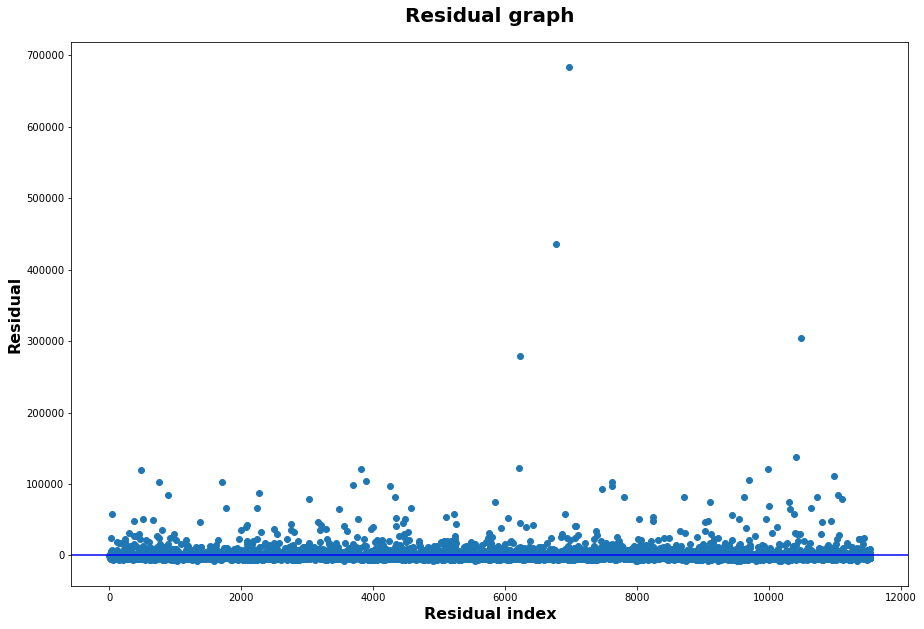

In [228]:
# Residual graph
predictions_model = pd.DataFrame(y_pred_ridge)
y_test_sample = y_test.reset_index(drop=True)
residuals = y_test_sample - predictions_model[0]
plt.figure(figsize=(15, 10))
plt.axhline(0, color="blue")
plt.title('Residual graph', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Residual index', fontsize=16, fontweight='bold')
plt.ylabel('Residual', fontsize=16, fontweight='bold')
plt.scatter(residuals.index, residuals)
plt.savefig('reg_residuals.png', dpi=150)
plt.show()

In [229]:
act_pred_df = pd.DataFrame()
y_test_values = y_test.reset_index(drop=True, inplace=False)
act_pred_df["actual"] = y_test_values

In [230]:
act_pred_df['predicted'] = predictions_model.iloc[:, 0]

In [231]:
act_pred_df

,actual,predicted
0,3600,4466.629882
1,1400,1607.672112
2,903,3564.996330
3,895,1343.107495
4,1100,-756.144109
...,...,...
11530,686,2707.007947
11531,984,2617.044640
11532,1100,4543.426707
11533,903,3075.522193


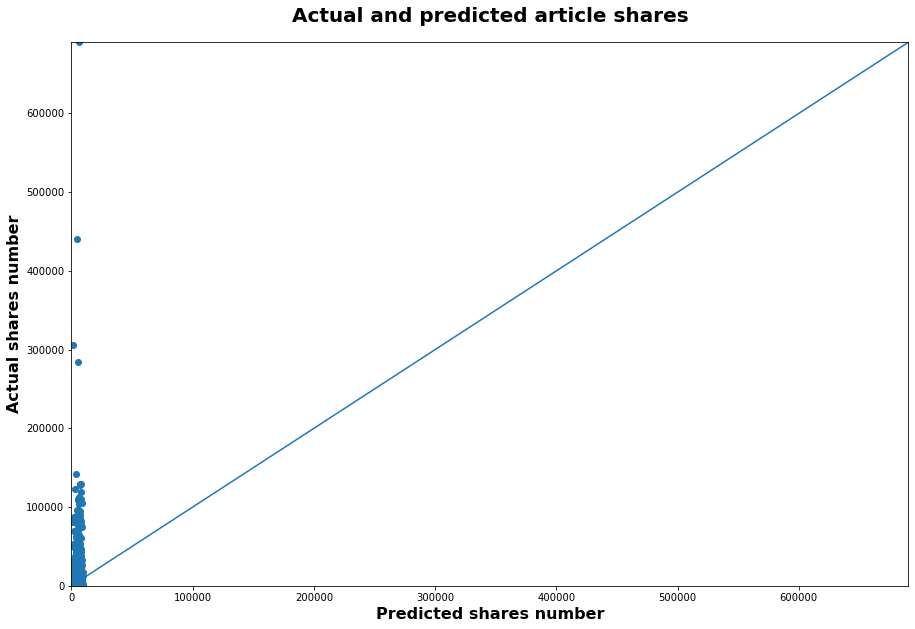

In [232]:
plt.figure(figsize=(15, 10))
plt.xlim(-1, act_pred_df['actual'].max())
plt.ylim(-1, act_pred_df['actual'].max())
plt.scatter(act_pred_df['predicted'], act_pred_df['actual'])
plt.xlabel('Predicted shares number', fontsize=16, fontweight='bold')
plt.ylabel('Actual shares number', fontsize=16, fontweight='bold')
plt.plot([-1, act_pred_df['actual'].max()], [-1, act_pred_df['actual'].max()])
plt.title('Actual and predicted article shares', fontsize=20, fontweight='bold', pad=20)
plt.savefig('reg_actual_predicted.png', dpi=150)
plt.show()